# Pymaceuticals

In [576]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [577]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [578]:
# Files to Load 
mouse_file = "Data/mouse_drug_data.csv"
clinical_file = "Data/clinicaltrial_data.csv"

In [579]:
# Read the files
mouse_data = pd.read_csv(mouse_file)
clinical_data = pd.read_csv(clinical_file)

##### Combined dataset

In [580]:
# Combine the data into a single dataset by mouse id
clinical_mouse_data = pd.merge(clinical_data, mouse_data, on = "Mouse ID", how = "outer")

# Select rows 
c_info = clinical_mouse_data.loc[clinical_mouse_data["Timepoint"] == 0,:]

#clinical_mouse_data.head()

# Reset the index after selecting desired rows
clinical = c_info.reset_index(drop=True)

# Display the dataframe
clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [581]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = clinical_mouse_data.groupby(["Drug", "Timepoint"], as_index=False).mean()

del mean_tumor_volume["Metastatic Sites"]

mean_tumor_volume.head(100)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [582]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

#  First select the columns necessary for the calculation
clinical_info=clinical_mouse_data[["Drug","Timepoint", "Tumor Volume (mm3)"]]

# Calculate standard error volume 
standard_error_volume = clinical_info.groupby(["Drug", "Timepoint"]).sem()

# Reset the index value to remove groupby values as indexes
standard_error_volume = standard_error_volume.reset_index()
 
# Preview DataFrame
standard_error_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [583]:
# Create the new dataframe with new formatting
drug_data= pd.pivot_table(mean_tumor_volume, index= "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
drug_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [584]:
# Select the mean values to use for the plot(capomulin, infubinoln ketapril and placebo)
means1 = mean_tumor_volume.loc[(mean_tumor_volume["Drug"] == "Capomulin"), "Tumor Volume (mm3)"]
means2 = mean_tumor_volume.loc[(mean_tumor_volume["Drug"] == "Infubinol"), "Tumor Volume (mm3)"]
means3 = mean_tumor_volume.loc[(mean_tumor_volume["Drug"] == "Ketapril"), "Tumor Volume (mm3)"] 
means4 = mean_tumor_volume.loc[(mean_tumor_volume["Drug"] == "Placebo"), "Tumor Volume (mm3)"]
                               
means2

20    45.000000
21    47.062001
22    49.403909
23    51.296397
24    53.197691
25    55.715252
26    58.299397
27    60.742461
28    63.162824
29    65.755562
Name: Tumor Volume (mm3), dtype: float64

In [585]:
# Select the error values to use for the plot
errors1 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Capomulin"), "Tumor Volume (mm3)"]
errors2 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Infubinol"), "Tumor Volume (mm3)"]
errors3 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Ketapril"), "Tumor Volume (mm3)"]
errors4 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Placebo"), "Tumor Volume (mm3)"]

errors1

0    0.000000
1    0.448593
2    0.702684
3    0.838617
4    0.909731
5    0.881642
6    0.934460
7    1.052241
8    1.223608
9    1.223977
Name: Tumor Volume (mm3), dtype: float64

In [586]:
# Select the column that needed for the plot
drug_df = drug_data[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Reset the index to reach the columns
drug_info = drug_df.reset_index()
drug_info

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


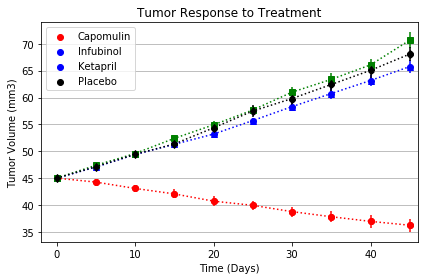

In [589]:
# Generate the Plot (with Error Bars)

#ax = drug_info.plot(kind = "scatter", x="Timepoint", y="Capomulin", color = "red", label="Capomulin")

# Create scatter plot for Capomulin values
capomulin = plt.scatter(drug_info["Timepoint"], drug_info["Capomulin"], color = "red", label = "Capomulin")
plt.errorbar(drug_info["Timepoint"],drug_info["Capomulin"], yerr=errors1, color = "red", fmt = "o", linestyle = ":")

# Create a scatter plot for Infubinol values
infubinol = plt.scatter(drug_info["Timepoint"], drug_info["Infubinol"], color = "blue", label = "Infubinol")
plt.errorbar(drug_info["Timepoint"],drug_info["Infubinol"], yerr=errors2, color = "blue", fmt = "^", linestyle = ":")

# Create a scatter plot for Ketapril values
ketapril = plt.scatter(drug_info["Timepoint"], drug_info["Ketapril"], color = "blue", label = "Ketapril")
plt.errorbar(drug_info["Timepoint"],drug_info["Ketapril"], yerr=errors3, color = "green", fmt = "s", linestyle = ":")

# Create a scatter plot for Placebo values
placebo = plt.scatter(drug_info["Timepoint"], drug_info["Placebo"], color = "black", label = "Placebo")
plt.errorbar(drug_info["Timepoint"],drug_info["Placebo"], yerr=errors4, color = "black", fmt = "d", linestyle = ":")



# Add labels and limits to the plot
plt.grid(axis="y")
plt.xlim(-2, max(drug_info["Timepoint"]) + 1)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(loc="best")


# Create the plot
#ax = drug_df.plot(kind = "line")



# Save the Figure
plt.tight_layout()
plt.savefig("Images/volume_change.png")
plt.show()


## Metastatic Response to Treatment

In [489]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Group the dataframe by drug and timepoint and calculate mean
mean_metastatic = clinical_mouse_data.groupby(["Drug", "Timepoint"]).mean()

# Display the grouped dataframe
mean_metastatic.head()                                             


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [490]:
# Get timepoint and drug data to greate new dataFrame
# Select the necessary columns, and drop the rest
clinical_df = clinical_mouse_data.drop(["Mouse ID", "Metastatic Sites"], axis = 1)

# Create a pivot table from the data, set index and colums
drug_data = pd.pivot_table(clinical_df, index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

# Display the dataframe
drug_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [491]:
 #Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [492]:
 #Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Select the columns for new dataframe
clinical_mouse = clinical_mouse_data[["Drug", "Timepoint", "Mouse ID"]]    

# Group new dataframe by drug and timepoint and count grouped mouses
mouse_count = clinical_mouse.groupby(["Drug", "Timepoint"])
mouse_df = mouse_count.count()

# Reset the index 
mouse_df = mouse_df.reset_index()

# Display the new dataframe
mouse_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [493]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


## Sumary Bar Graph

In [ ]:
 #Calculate the percent changes for each drug

# Display the data to confirm
